# 주제: 소나탐지

## 레포지토리: UC Irvine Machine Running Repository

## 데이터: Sonar, Mines vs. Rocks 데이터셋
### [실제 자료 링크](https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks)

## 알고리즘: 랜덤 포레스트

## 정확도: 95.24%

### - 필요한 라이브러리 설치 및 임포트

In [159]:
!pip install ucimlrepo scikit-learn xgboost matplotlib seaborn

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo

### - 데이터 형태 출력

#### 데이터 개수: 208 (기뢰: 111 / 암석:97)

#### 각 데이터 특징: 60

#### 데이터 값: M(Mines, 기뢰) / R(Rocks, 암석)

#### 결측값 없는 데이터셋

In [160]:
data = fetch_ucirepo(id=151)
X = data.data.features
y = data.data.targets

print(f"특징 X 전체 모양: {X.shape}")
print(f"  값 y 전체 모양: {y.shape}")
print(f"         값 종류: {np.unique(y)}")

특징 X 전체 모양: (208, 60)
  값 y 전체 모양: (208, 1)
         값 종류: ['M' 'R']


### sonar.all-data 파일

### - 값이 M인 데이터 중 하나
![로컬 이미지](./png/DataSet_M.png)

### - 값이 R인 데이터 중 하나
![로컬 이미지](./png/DataSet_R.png)

#### 소나 여러 주파수 대역에서 측정된 에너지 값 (0이상 1이하의 실수)
#### 마지막에는 M 또는 R

### - 데이터의 결과값인 M/R을 숫자형인 0/1로 변환

In [161]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.values.ravel())

### - 데이터를 학습/테스트 데이터로 분할
#### 학습 데이터: 90% / 테스트 데이터: 10%

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### - 랜덤 포레스트 모델 학습
#### '리프 노드 최소 샘플 개수'는 설정 시 오히려 정확도 떨어짐 -> 미사용
#### '트리 개수', '트리 깊이 제한', '분할 최소 샘플 개수', '각 트리가 사용할 특성 개수', '랜덤 스테이트'를 적절히 조정하여 최적의 검증 정확도 도출

In [163]:
rf_model = RandomForestClassifier(
    n_estimators = 220,   # 트리 개수
    max_depth = 25,   # 트리 깊이 제한
    min_samples_split = 10,   # 분할 최소 샘플 개수
    #min_samples_leaf = 5,   # 리프 노드 최소 샘플 개수
    max_features = 'sqrt',   # 각 트리가 사용할 특성 개수 (sqrt: 전체 특성의 제곱근 값)
    random_state = 42,
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_split=10,
                       n_estimators=220, random_state=42)

### - 전체 훈련/검증 정확도 계산 및 출력

In [164]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"훈련 정확도: {train_accuracy * 100:.2f}%")
print(f"검증 정확도: {test_accuracy * 100:.2f}%")

훈련 정확도: 100.00%
검증 정확도: 95.24%


### - 훈련/검증 정확도 학습에 따른 그래프 출력

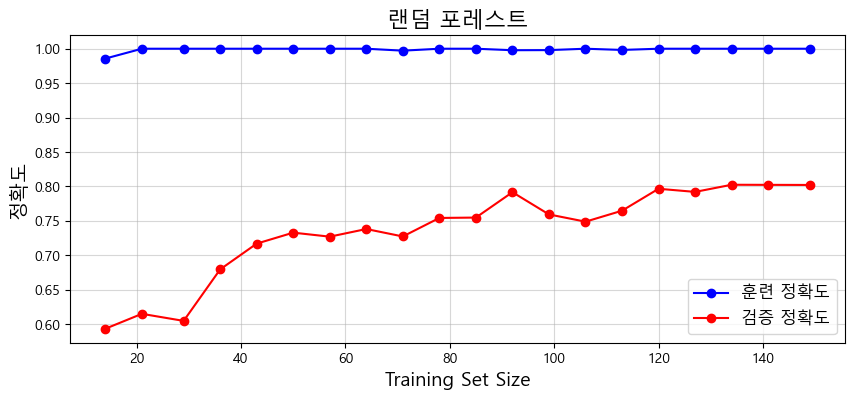

In [165]:
train_sizes, train_scores, val_scores = learning_curve(
    rf_model,
    X_train,
    y_train,
    cv = 5,  # 교차 검증 폴드 수
    scoring = 'accuracy',  # 평가 지표
    train_sizes = np.linspace(0.1, 1.0, 20)  # 학습 데이터 크기 비율
    # 10%부터 100%까지 20단계로 나누어 학습
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 4))
plt.plot(train_sizes, train_mean, label='훈련 정확도', color='blue', marker='o')
plt.plot(train_sizes, val_mean, label='검증 정확도', color='red', marker='o')
plt.title('랜덤 포레스트', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('정확도', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

## - ChatGPT 사용 부분

### [ChatGPT - 검증 정확도 향상 방법](https://chatgpt.com/share/6757eab5-aa78-8012-9cea-c00de1b17cab)

### [ChatGPT - 그래프 출력](https://chatgpt.com/share/6757e9ce-6d38-8012-bc38-c2b9b3c72d2a)

## - 해당 알고리즘 선정 이유

### [랜덤 포레스트 선정 이유](https://www.authorea.com/users/221172/articles/275094-sonar-mines-vs-rocks)

### The model that gave the best results was random forest. - 로지스틱 회귀, 의사 결정 트리, 지원 벡터 머신, 랜덤 포레스트, xgboost 중 가장 좋은 결과를 낸 모델이 '랜덤 포레스트'였다고 나옴

## - 매개변수 선택 근거

### 매개변수의 값을 하나하나 조정해보면서 최적의 정확도가 나오는 값을 찾음

## - 결과 정확도

### 훈련 정확도: 훈련 데이터로 모델을 학습 시킨 후, 훈련 데이터로 정확도 측정

### 검증 정확도: 훈련 데이터로 모델을 학습 시킨 후, 테스트 데이터로 정확도 측정

### 숫자%에서의 검증 정확도: 전체 데이터셋을 한 번에 평가

### 그래프에서의 검증 정확도: 점진적 학습을 하며 그 지점에서의 성능 평가